# Matplotlib Advanced
## 🚩 Goals
1. Understand how to build multi-chart figures both with subplots and GridSpec layouts
2. Learn how to customize chart colors, by leveraging custom colormaps and creating my own
3. Take a look at pre-built stylesheets and dive into the settings behind them that allow extreme chart customization

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### 1. subplots
- fig, ax = plt.subplots(rows, columns)
- sharex, sharey arguments
    - SET the same axis limits on all the plots

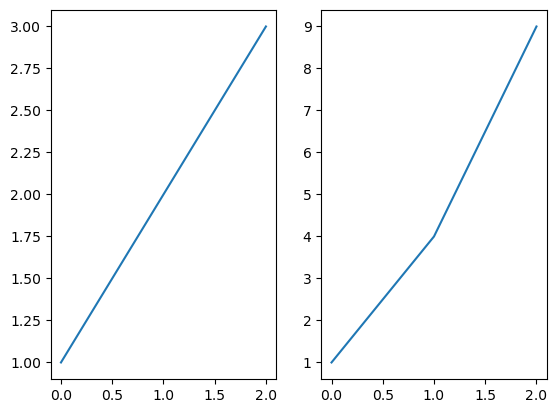

In [2]:
fig = plt.figure()

x = [0, 1, 2]

data = [1, 2, 3]
data2 = [1, 4, 9]

ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax.plot(data)
ax2.plot(x, data2);

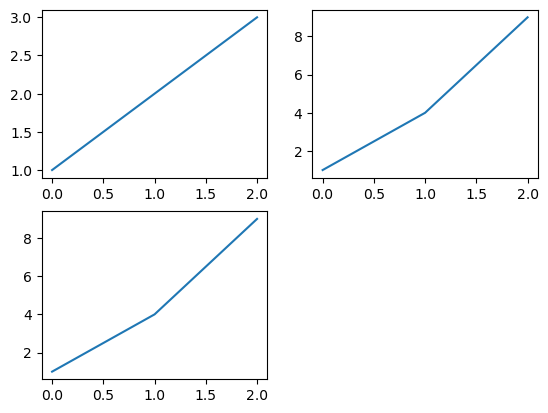

In [3]:
fig = plt.figure()

x = [0, 1, 2]

data = [1, 2, 3]
data2 = [1, 4, 9]

ax = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)

ax.plot(x, data)
ax2.plot(x, data2)
ax3.plot(x, data2);

In [4]:
housing_raw = pd.read_csv('./data/housing_data.csv')

ca_housing = (
    housing_raw
    .loc[housing_raw['region_name'].str.contains('CA')]
    .assign(region_name=housing_raw['region_name'].str[:-11])
    .set_index('period_begin')
    .sort_index()
)

ca_housing_pivot = (
    ca_housing.pivot_table(
        index='period_begin',
        columns='region_name',
        values='median_active_list_price'
    ).assign(CA_average=lambda x: x.mean(axis=1))
)

ca_housing_markets = (
    ca_housing_pivot
    .loc[
        :,
        ['San Francisco', 'Los Angeles', 'San Diego', 'Tulare']
    ]
)

ca_housing_markets.head(2)

region_name,San Francisco,Los Angeles,San Diego,Tulare
period_begin,,,,
2017-01-02,1229018.7,611561.0,618570.8,225395.8
2017-01-09,1233393.7,614061.0,621737.5,227729.1


In [5]:
housing_raw.head(1)

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
0,"Appling County, GA",2020-04-27,2020-07-19,NaN,1.0,1.0,222.7,136195.8,NaN


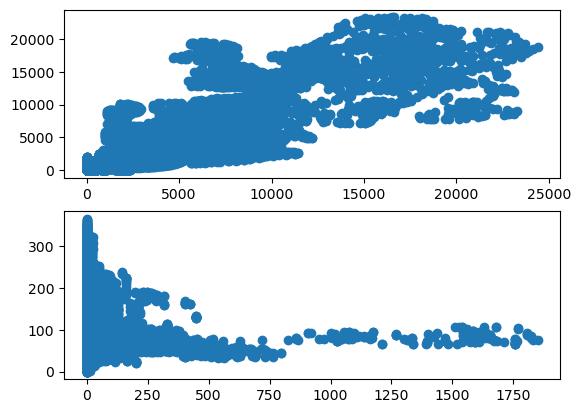

In [6]:
fig, ax = plt.subplots(2, 1)

ax[0].scatter(
    housing_raw.loc[:, 'total_homes_sold'],
    housing_raw.loc[:, 'inventory']
)

ax[1].scatter(
    housing_raw.loc[:, 'months_of_supply'],
    housing_raw.loc[:, 'age_of_inventory']
);

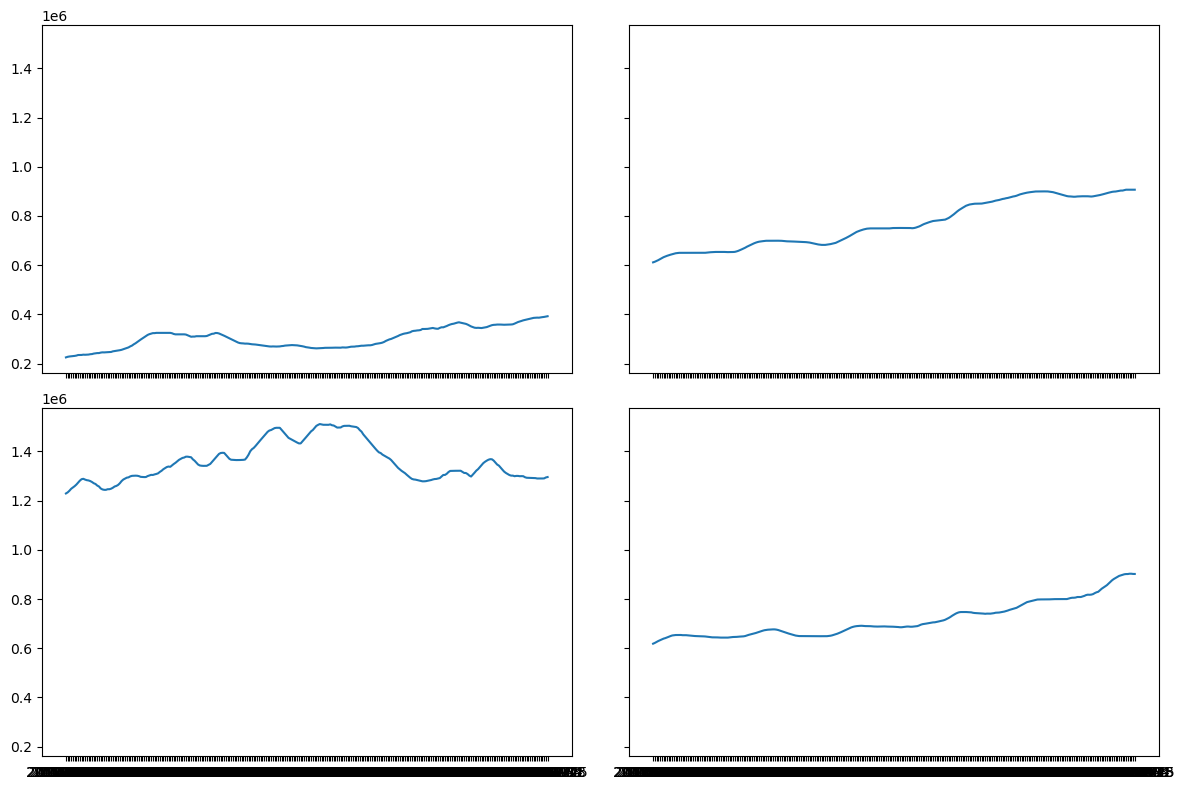

In [7]:
fig, ax = plt.subplots(
    2, 2,
    figsize=(12, 8),
    sharex='all',
    sharey='all'
)

ax[0][0].plot(
    ca_housing_markets.index,
    ca_housing_markets['Tulare']
)

ax[0][1].plot(
    ca_housing_markets.index,
    ca_housing_markets['Los Angeles']
)

ax[1][0].plot(
    ca_housing_markets.index,
    ca_housing_markets['San Francisco']
)

ax[1][1].plot(
    ca_housing_markets.index,
    ca_housing_markets['San Diego']
)

plt.tight_layout()

/var/folders/6m/0djhjcm16l566_6h_pcqsfmh0000gn/T/ipykernel_2150/2230607221.py:18: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax_list[0].get_shared_x_axes().join(ax_list[0], *ax_list)
/var/folders/6m/0djhjcm16l566_6h_pcqsfmh0000gn/T/ipykernel_2150/2230607221.py:19: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax_list[0].get_shared_y_axes().join(ax_list[0], *ax_list)


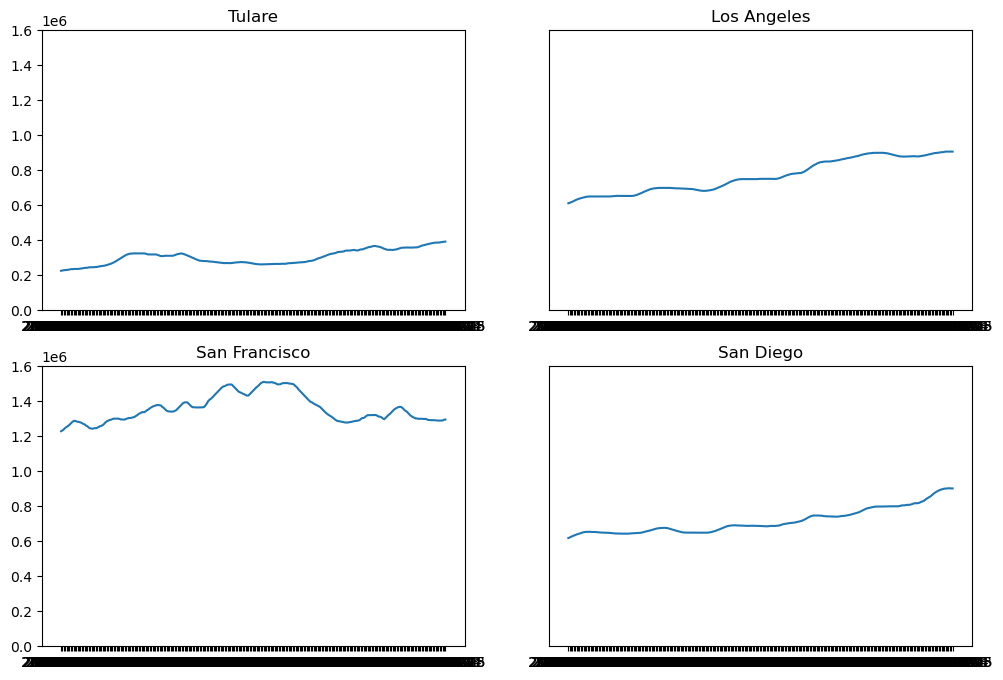

In [8]:
# Iteration
fig = plt.figure(figsize=(12, 8))

plot_list = ['Tulare', 'Los Angeles', 'San Francisco', 'San Diego']
ax_list = []

for i in range(1, len(plot_list) + 1):
    ax = fig.add_subplot(2, 2, i)
    ax.plot(ca_housing_markets.index, ca_housing_markets[f'{plot_list[i-1]}'])
    ax.set_ylim(0, 1600000)
    
    ax.set_title(f'{plot_list[i-1]}')
    ax_list.append(ax)
    
    if (i-1) % 2 != 0:
        ax.set_yticks([])
    
ax_list[0].get_shared_x_axes().join(ax_list[0], *ax_list)
ax_list[0].get_shared_y_axes().join(ax_list[0], *ax_list)

### 2. gridspec

In [9]:
from matplotlib.gridspec import GridSpec

In [10]:
diamonds = (
    pd.read_csv('./data/Diamonds Prices2022.csv').drop(['Unnamed: 0'], axis=1)
)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


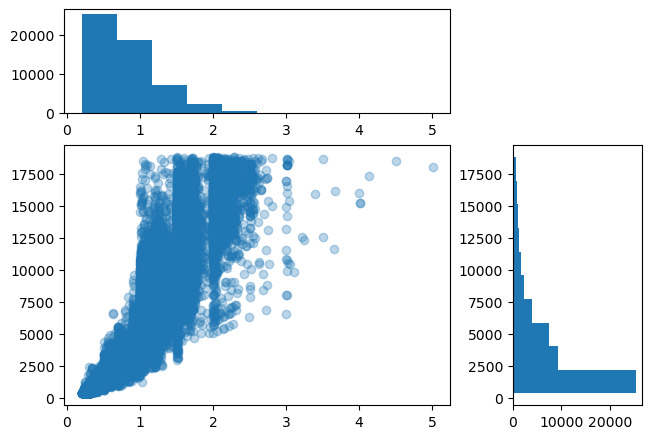

In [11]:
fig = plt.figure(layout='constrained')

grid = GridSpec(8, 8, figure=fig)

ax1 = fig.add_subplot(grid[2:7, 0:6])
ax1.scatter(
    diamonds['carat'],
    diamonds['price'],
    alpha=.3
)

ax2 = fig.add_subplot(grid[0:2, 0:6])
ax2.hist(diamonds['carat'])

ax3 = fig.add_subplot(grid[2:7, 6:]);
ax3.hist(diamonds['price'], orientation='horizontal');

### 3. colors
- color options (반복문으로 조회)
- color palettes
    - https://matplotlib.org/stable/tutorials/colors/colormaps.html

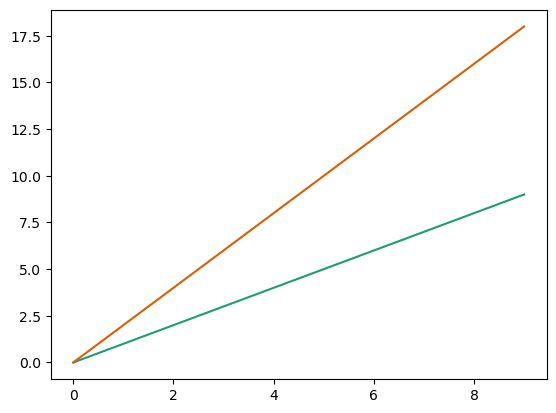

In [12]:
plt.rcParams['axes.prop_cycle'] = plt.cycler('color', plt.cm.Dark2.colors)

data = [x for x in range(10)]
data2 = [x*2 for x in range(10)]

fig, ax = plt.subplots()

ax.plot(data)
ax.plot(data2);